In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#import the jma nitrate file, then get columns I want for training
infile = 'jma_nitrate.csv'
nitratefile = pd.read_csv(infile,sep=(','))
nitratefilefiltered = nitratefile[nitratefile.nitrate>0]
X = nitratefilefiltered[["sal","theta"]]
y = nitratefilefiltered[["nitrate"]]
print(np.shape(X))
print(np.shape(y))


#split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

(15574, 2)
(15574, 1)


In [30]:
# generate the data
import matplotlib.pyplot as plt
import random


# pick model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
    
#run KNN with K neighbors ranging from 1-15, calculating 
#r2 and RMSE to find the best fit model
results = []
for n in range(1,16,1):
    res = []
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    print ('Neighbors = %s\n' % (int(n)))
    # compute the R^2 score
    accuracyscore = model.score(X_train,y_train)
    print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
    xfit = X_test
    yfit = model.predict(xfit)
    print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
    rmse = sqrt(mean_squared_error(y_test, yfit))
    print("RMSE = %s \n" % (rmse))
    res = [n,accuracyscore,rmse]
    results.append(res)


Neighbors = 1

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 2.60583634979 

Neighbors = 2

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.43027580855 

Neighbors = 3

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.32055264461 

Neighbors = 4

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.29476945682 

Neighbors = 5

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.26583889298 

Neighbors = 6

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.2178488084 

Neighbors = 7

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.2136395187 

Neighbors = 8

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.19532105271 

Neighbors = 9

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.20220798138 

Neighbors = 10

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.19394523563 

Neighbors = 11

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.20233819118 

Neighbors = 12

Train

In [26]:
#Make list into array to plot nicely, in order to look at all of the 
#results

myarray = np.asarray(results)

#make a dataframe with each column named for ploting
data = pd.DataFrame({'Kneighbors': myarray[:,0], 'AccScore': myarray[:,1], 'RMSE': myarray[:,2]})
data


,AccScore,Kneighbors,RMSE
0,0.999911,1.0,2.605836
1,0.992724,2.0,2.430276
2,0.989437,3.0,2.320553
3,0.987749,4.0,2.294769
4,0.986243,5.0,2.265839
5,0.985364,6.0,2.217849
6,0.984661,7.0,2.213640
7,0.984078,8.0,2.195321
8,0.983682,9.0,2.202208
9,0.983316,10.0,2.193945


In [31]:
#Run best fit model, and display results
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
print ('Neighbors = %s\n' % (10))
    # compute the R^2 score
accuracyscore = model.score(X_train,y_train)
print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
rmse = sqrt(mean_squared_error(y_test, yfit))
print("RMSE = %s \n" % (rmse))

Neighbors = 10

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.19394523563 



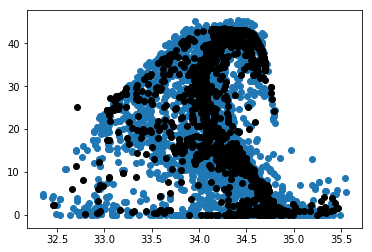

In [32]:
#Plot salinity vs. nitrate predicted
plt.scatter(X_train[["sal"]],y_train)
plt.scatter(xfit[["sal"]], yfit,c = 'k')

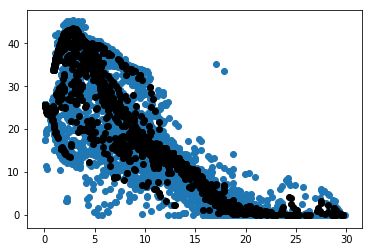

In [33]:
#Plot temperature vs. nitrate predicted
plt.scatter(X_train[["theta"]],y_train)
plt.scatter(xfit[["theta"]], yfit,c = 'k')

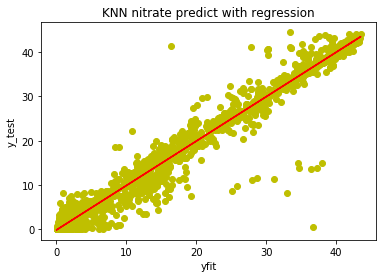

In [44]:
#Plot predicted nitrate from test compared to actual nitrate from test
#this is using the best fit model decided above
from sklearn.linear_model import LinearRegression
plt.scatter(yfit,y_test,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(yfit, y_test)  # perform linear regression
Y_pred = linear_regressor.predict(yfit)  # make predictions
plt.plot(yfit, Y_pred, color='red')
plt.xlabel("yfit")
plt.ylabel("y_test")
plt.title("KNN nitrate predict with regression")
plt.show()

In [186]:
#File using all of data for training
#nitratefile

infilekuro = 'kuro_BGCargo_noNO3.csv'
nitratefilekuro = pd.read_csv(infilekuro,sep=(','))
X = nitratefilekuro[["SALINITY[PSS]","TEMPERATURE[C]"]]

infilekurowithnitrate = 'kuro_BGCargo_NO3.csv'
realNO3file = pd.read_csv(infilekurowithnitrate,sep=(','))
NO3real = realNO3file[["NITRATE[uMOL/KG]"]]

kuroLatLon = nitratefilekuro[["LON","LAT"]]
nfileLatLon = nitratefile[["lon","lat"]]

kuroDepthDensity = nitratefilekuro[["DEPTH[M]","SIGMATHETA[KG/M3]"]]
nfileDepthDensity = nitratefile[["depth","density"]]

kuroTS = X
nfileTS = nitratefile[["theta","sal"]]

#Following is me trying to figure out how to look at seasonality

nitratefile[["month"]]
nfileDate = nitratefilekuro[["Date/GMT"]]
elementlist = []
index = []
nfileMonth = []
#nfileDateString = nfileDate.to_string()

for i in nfileDate.iterrows():
    istring = str(i[1])
    #print istring
    #stringi = i.to_string()
    elementlist=istring.split("/")
    getmonth = elementlist[1].split(" ")
    #print getmonth[4]
    nfileMonth.append(int(getmonth[4]))
    

In [187]:
nfileMonth = np.asarray(nfileMonth)
nfileMonth

array([3, 3, 3, ..., 1, 1, 1])

In [ ]:
#Following is comparison of various parameters mention in the PSET

Text(0.5,1,'Salinity vs temperature plotted for each dataset (yellow = BGC Argo, blue = JMA)')

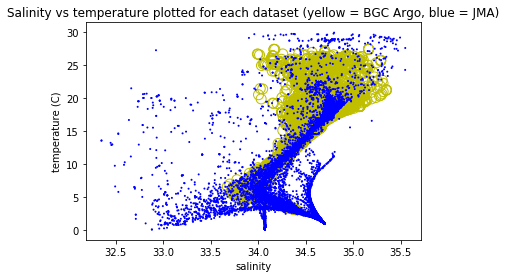

In [127]:
plt.scatter((kuroTS[["SALINITY[PSS]"]]),kuroTS[["TEMPERATURE[C]"]],s=100,facecolors='none',edgecolors = 'y')
plt.scatter(nfileTS[["sal"]],nfileTS[["theta"]],s=1, facecolors='none', edgecolors='b')
plt.xlabel("salinity")
plt.ylabel("temperature (C)")
plt.title("Salinity vs temperature plotted for each dataset (yellow = BGC Argo, blue = JMA)")

Text(0.5,1,'Depth vs density plotted for each dataset (yellow = BGC Argo, blue = JMA)')

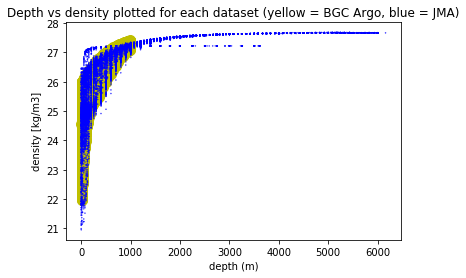

In [115]:
plt.scatter((kuroDepthDensity[["DEPTH[M]"]])*(-1),kuroDepthDensity[["SIGMATHETA[KG/M3]"]],s=100,color = 'y')
plt.scatter(nfileDepthDensity[["depth"]],nfileDepthDensity[["density"]],s=0.2, facecolors='none', edgecolors='b')
plt.xlabel("depth (m)")
plt.ylabel("density [kg/m3]")
plt.title("Depth vs density plotted for each dataset (yellow = BGC Argo, blue = JMA)")

Text(0.5,1,'Lat/Lon plotted for each dataset (yellow = BGC Argo, blue = JMA)')

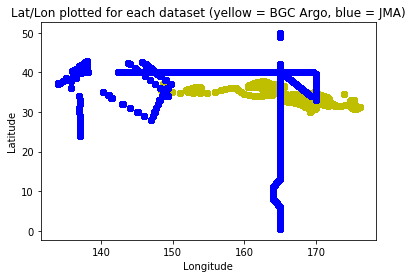

In [93]:
plt.scatter(kuroLatLon[["LON"]],kuroLatLon[["LAT"]],color = 'y')
plt.scatter(nfileLatLon[["lon"]],nfileLatLon[["lat"]], color='b')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Lat/Lon plotted for each dataset (yellow = BGC Argo, blue = JMA)")

In [87]:
Xconcat = pd.concat([X, NO3real], axis=1)
#print Xconcat.shape
NO3filter =  Xconcat['NITRATE[uMOL/KG]']>0
#print(NO3filter.head())
AllNo3filtered = Xconcat[NO3filter]
X = AllNo3filtered[["SALINITY[PSS]","TEMPERATURE[C]"]]
NO3real = AllNo3filtered[["NITRATE[uMOL/KG]"]]
#print AllNo3filtered.shape

In [85]:
NO3predicted = model.predict(X)
NO3predicted

array([[42.054],
       [41.457],
       [41.446],
       ...,
       [40.26 ],
       [39.383],
       [38.218]])

0.9540768207601698


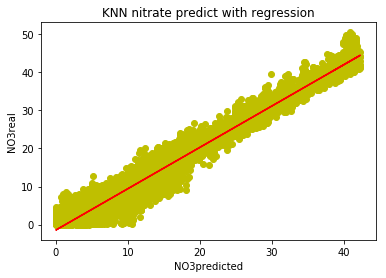

RMSE = 2.5627586437 



In [86]:

#NO3realfilter = NO3real[NO3real.NITRATE[uMOL/KG]>0]
ax = plt.scatter(NO3predicted,NO3real,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(NO3predicted, NO3real)  # perform linear regression
Y_pred = linear_regressor.predict(NO3predicted)  # make predictions
plt.plot(NO3predicted, Y_pred, color='red')
plt.xlabel("NO3predicted")
plt.ylabel("NO3real")
r2 = r2_score(NO3predicted, NO3real)
print r2
#text(50, 5, r2, fontsize=12)
plt.title("KNN nitrate predict with regression")
plt.show()
rmse = sqrt(mean_squared_error(NO3predicted, NO3real))
print("RMSE = %s \n" % (rmse))